# II. VIZUALIZACE 

* matplotlib -> Seaborn
* plotly express (interaktivita, one-liner)
* plotly (graph_objects, buttons)
* Dash = dashboard framework
* Flask App (základ Dashe)
* Heroku = PaaS, podporující Flask apps  XXX
* Salesforce = parent of Heroku XXX
* --> Plotly + Dash + Heroku XXX
* VÝHODA: možnost krom jednoho html grafu zobrazit i texty okolo, vylistovat zápasy atd., checkboxy, dropdowny...
* automatické generování vizualizací na webu při změne github repository (přibyde nová vizualizace, nebo dataset?)
* --- najít si  (google) data studio, google CLoud Run, a Firebase

## II.1 - STATISTIKY závodníci a kluby obecně

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

def printbold(s):
    print("\033[1m" + s + "\033[0m")

### Loading - tyto dvě rozdělené použiji později

In [122]:
df_w = pd.read_excel(f"C:/Users/jzelenka/Documents/python_j/fencing/1_zavodnici_W.xlsx")
printbold(str(len(df_w)))
display(df_w.head(2))
display(df_w.tail(2))

df_m = pd.read_excel(f"C:/Users/jzelenka/Documents/python_j/fencing/1_zavodnici_M.xlsx")
printbold(str(len(df_m)))
display(df_m.head(2))
display(df_m.tail(2))

139


Name             Club Country Sex  Birthdate  Year
0        ADAMCOVÁ Anita   TJ LOKO K.VARY     CZE   W 2006-01-22  2006
1  AIGERMANOVÁ Gabriela  TJ LOKO TEPLICE     CZE   W 2002-06-07  2002

Name           Club Country Sex  Birthdate  Year
137   ŽOLNOVÁ Karolína  DUKLA OLOMOUC     CZE   W 1995-10-23  1995
138  ŽÁDNÍKOVÁ Daniela  DUKLA OLOMOUC     CZE   W 1984-07-31  1984

195


Name           Club Country Sex  Birthdate  Year
0                ADAM Ondřej       VUT BRNO     CZE   M 1993-08-26  1993
1  ADDO DJAN Theodor Ezekiel  SOKOL DEJVICE     CZE   M 2006-11-06  2006

Name            Club Country Sex  Birthdate  Year
193  ZELENKA Jiří    VSK HUMANITA     CZE   M 1993-06-04  1993
194   ZHÁŇAL Petr  TJ DUKLA PRAHA     CZE   M 2002-05-17  2002

### Zde jeden hlavní dataset, co si zvolím

In [131]:
SEX = "M"

In [132]:
df = pd.read_excel(f"C:/Users/jzelenka/Documents/python_j/fencing/1_zavodnici_{SEX}.xlsx")
printbold(str(len(df)))
display(df.head(2))
display(df.tail(2))

195


Name           Club Country Sex  Birthdate  Year
0                ADAM Ondřej       VUT BRNO     CZE   M 1993-08-26  1993
1  ADDO DJAN Theodor Ezekiel  SOKOL DEJVICE     CZE   M 2006-11-06  2006

Name            Club Country Sex  Birthdate  Year
193  ZELENKA Jiří    VSK HUMANITA     CZE   M 1993-06-04  1993
194   ZHÁŇAL Petr  TJ DUKLA PRAHA     CZE   M 2002-05-17  2002

In [5]:
df[df.Year > 2006]  # ti nejmladší - potenciální chyba v datu narození

Name               Club Country Sex  Birthdate  Year
3         BARTOŠKOVÁ Adéla           SC PRAHA     CZE   W 2009-11-26  2009
9        CEJNAROVÁ Barbora           SC PRAHA     CZE   W 2007-04-22  2007
18     FORMANOVÁ Elizabeth     TJ LOKO K.VARY     CZE   W 2008-05-21  2008
40            JURKOVÁ Hana      DUKLA OLOMOUC     CZE   W 2009-07-20  2009
42        KAHABKOVÁ Eliška           SC PRAHA     CZE   W 2008-03-13  2008
43           KINCLOVÁ Emma           SC PRAHA     CZE   W 2008-05-19  2008
52        KÜHNOVÁ Karolína  SLAVOJ LITOMĚŘICE     CZE   W 2007-08-13  2007
57    LANDGRAFOVÁ Veronika    TJ LOKO TEPLICE     CZE   W 2008-08-02  2008
66      MIKLENDOVÁ Valérie      DUKLA OLOMOUC     CZE   W 2007-05-01  2007
87      RAKOUŠOVÁ Karolína           SC PRAHA     CZE   W 2007-07-01  2007
88           ROHANOVÁ Anna      TJ LOKO PLZEN     CZE   W 2008-11-17  2008
90           ROVENSKÁ Emma           SC PRAHA     CZE   W 2007-08-10  2007
105  TODORYSHYNA Viktoriia     TJ SOKOL PÍSEK     UKR   W 2007-03-25  2007
109    TVARŮŽKOVÁ Karolína     TJ LOKO K.VARY     CZE   W 2007-06-10  2007
115       VALENTOVÁ Amálie           SC PRAHA     CZE   W 2007-08-23  2007
121     VYSLOUŽILOVÁ Vanda           SC PRAHA     CZE   W 2007-01-13  2007
127     ZÁVITKOVSKÁ Zuzana           SC PRAHA     CZE   W 2008-01-25  2008

## II.1.1 - Počty závodníků podle roku narození

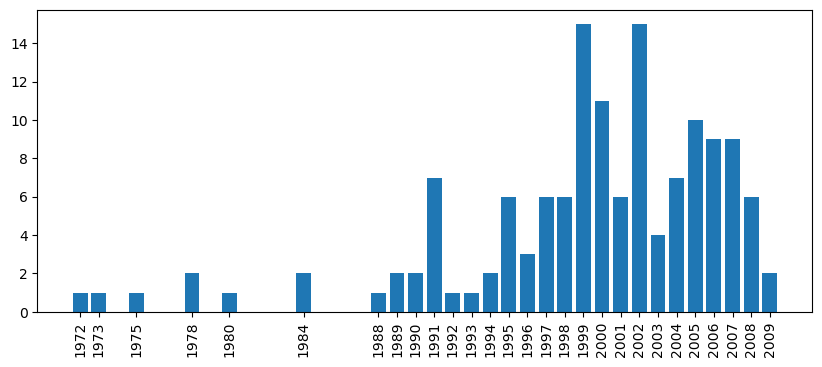

In [6]:
#plt.style.use('ggplot')
#plt.hist(df["Year"])

figure(figsize=(10, 4), dpi=100)

years = sorted(df["Year"].unique())
counts = df.groupby('Year')['Year'].count()
plt.xticks(years, rotation='vertical')
plt.bar(years, counts, width=0.8)  # šířka sloupečku

plt.show()

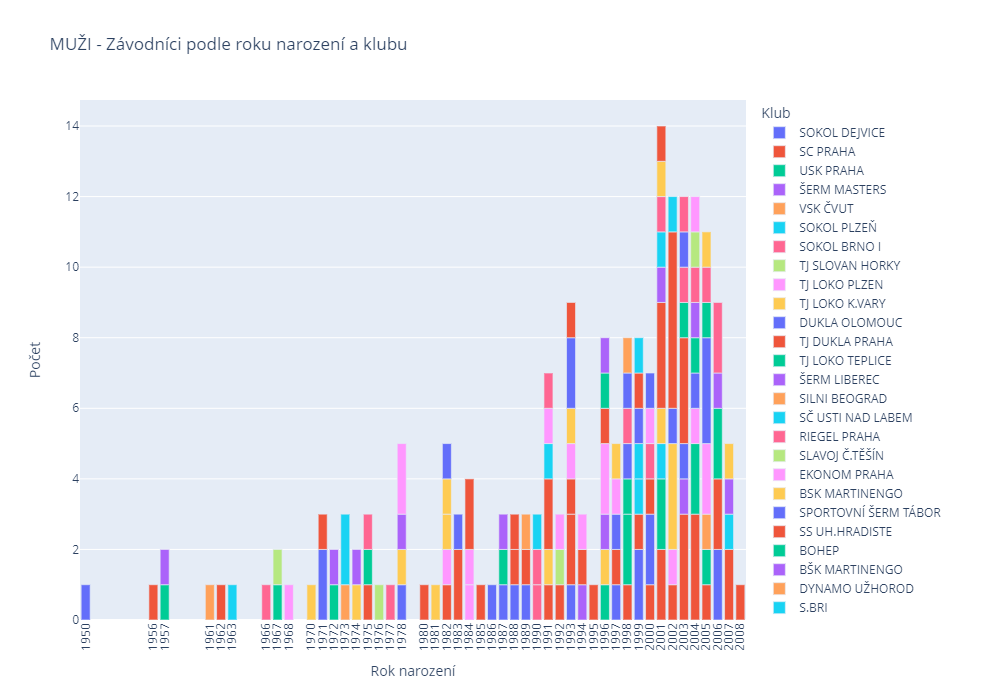

In [133]:
# obyčejný groupby podle dvou sloupců nestačí:
# d1 = df.groupby(['Year', "Club"])["Year"].count() 
# potřbeuju z toho udělat standardní dataframe se všemi popsanými řádky
# 1960 - Club - počet,, 1960 - Klub 2 - počet 2

#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
d2 = pd.DataFrame({'count' : df.groupby( [ 'Year', "Club"] ).size()}).reset_index()

if SEX == "W":
    title_sex = "ŽENY"
elif SEX == "M":
    title_sex = "MUŽI"
else:
    title_sex = "ERROR"

fig = px.bar(d2, x= d2["Year"],
             y= d2["count"], 
             color = d2["Club"] ,
             #text_auto='.0s',       # případně můžu zap/vyp číselné popisky
             width=950, height=700,
             labels = {"Club": "Klub"},  # Novinka: můžu přepsat konkrétní místo, toto je konkrétně automaticky vygenerovaný název legendy
             title = f"{title_sex} - Závodníci podle roku narození a klubu")

#fig.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
fig.update_layout(xaxis = dict(tickvals = d2["Year"]))
fig.update_xaxes(tickangle=270)
fig.update_xaxes(title_text="Rok narození")
fig.update_yaxes(title_text="Počet")
fig.show()

pio.write_html(fig, file = f"vizualizace/V1_Year-Club_{SEX}.html", auto_open=True)

# ještě jde přidat dropdown například pro Pohlaví. případně checkboxy by byly super
# https://plotly.com/python/bar-charts/

## II.1.2 - Počty závodníků podle klubů
#### Zde by se hodil rozpad na může a ženy, v plotly verzi 

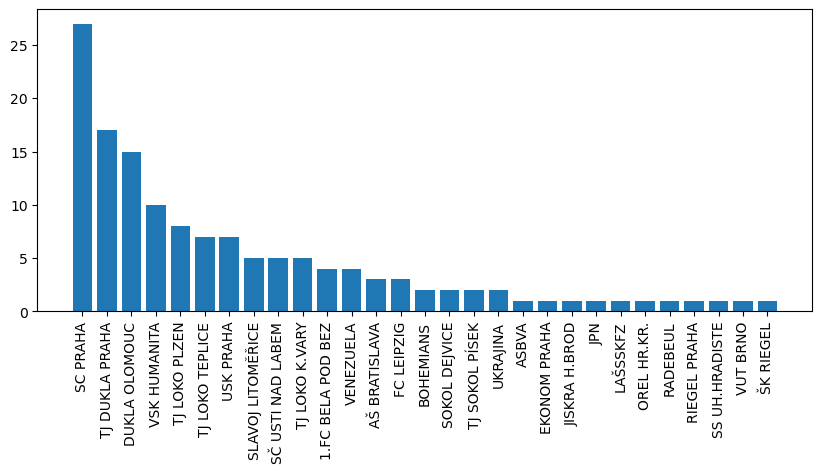

In [8]:
# Verze 2 - přes Dictionary
# https://www.includehelp.com/python/groupby-results-to-dictionary-of-lists.aspx
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html

figure(figsize=(10, 4), dpi=100)

clubs = df.groupby(['Club'])['Club'].count().to_dict()
clubs = dict(sorted(clubs.items(), key=lambda item: item[1], reverse = True))

plt.xticks(rotation='vertical')                             # muselo se tu jen odebrat to jméno z labelů, kůli problémům že to je kategorická proměnná
plt.bar(list(clubs.keys()), list(clubs.values()), width=0.8)# šířka sloupečku

plt.show()

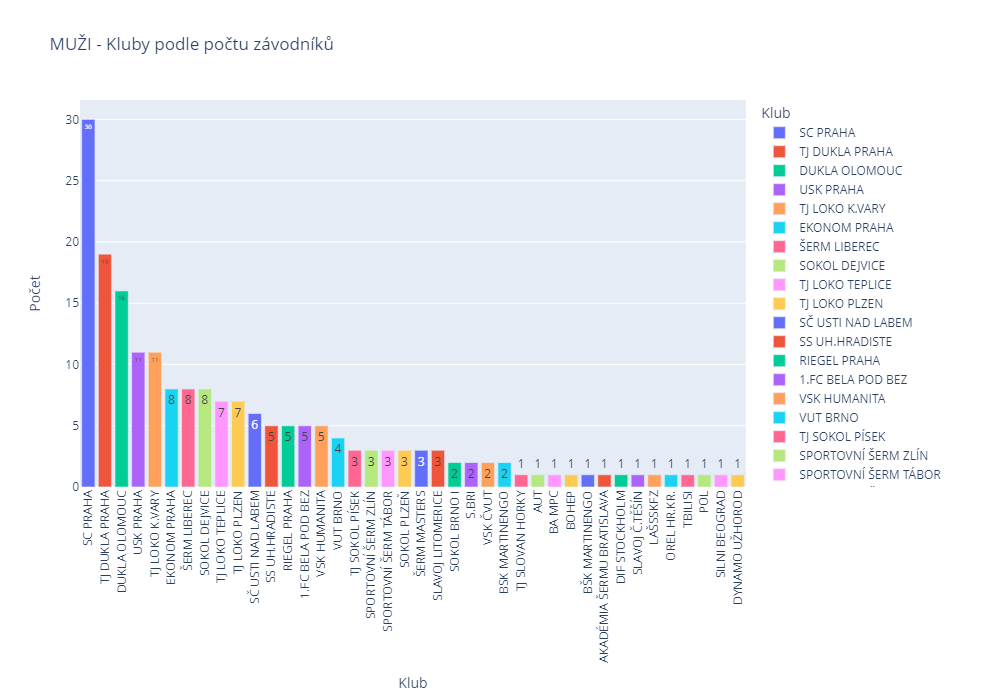

In [134]:
d3 = pd.DataFrame({'count' : df.groupby( ["Club"] ).size()}).reset_index()
d3 = d3.sort_values("count", ascending = False)

if SEX == "W":
    title_sex = "ŽENY"
elif SEX == "M":
    title_sex = "MUŽI"
else:
    title_sex = "ERROR"

fig = px.bar(d3, x= d3["Club"],
             y= d3["count"], 
             color = d3["Club"] ,
             text_auto='.0f',       # případně můžu zap/vyp číselné popisky  # .0f = přesné číslo, .0s je na desítky
             width=950, height=700,
             labels = {"Club": "Klub"},  # Novinka: můžu přepsat konkrétní místo, toto je konkrétně automaticky vygenerovaný název legendy
             title = f"{title_sex} - Kluby podle počtu závodníků")

#fig.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
fig.update_layout(xaxis = dict(tickvals = d3["Club"]))
fig.update_xaxes(tickangle=270)
fig.update_xaxes(title_text="Klub")
fig.update_yaxes(title_text="Počet")
fig.show()

pio.write_html(fig, file = f"vizualizace/V2_Club_{SEX}.html", auto_open=True)

## II.1.3 - Statistiky k medailím - opět z celého datasetu df_m_ranky (447 řádků)
* medaile podle kovu - nutnost vyřešit překrývání sloupců
* pro složitější ploty (víc než jeden simple groupby) budou lepší dictionaries, případně listy i s nulami
* např. pro stacked nebo sdružené sloupce

In [135]:
df_m_ranky = pd.read_excel(f"C:/Users/jzelenka/Documents/python_j/fencing/2_ranky_{SEX}.xlsx")
printbold(str(len(df_m_ranky)))
display(df_m_ranky.head(2))
display(df_m_ranky.tail(2))

839


Name             Club Country  Birthdate       Date          Event  \
0  ANDERLE Petr     RIEGEL PRAHA     CZE 1977-07-07 2020-02-22  Dukla Olomouc   
1  BALCAR Josef  TJ LOKO TEPLICE     CZE 1998-10-31 2020-02-22  Dukla Olomouc   

  Sex  Rank First_rank  Final_rank     Notes  Year  
0   M  36.0         16          19  Advanced  1977  
1   M  10.0         17          14  Advanced  1998

Name          Club Country  Birthdate       Date     Event Sex  \
837  WALLER Jonáš      SC PRAHA     CZE 2008-10-10 2022-12-17  Memorial   M   
838  ZELENKA Jiří  VSK HUMANITA     CZE 1993-06-04 2022-12-17  Memorial   M   

      Rank First_rank  Final_rank       Notes  Year  
837   25.0         35          29    Advanced  2008  
838  131.0         95          95  Eliminated  1993

In [136]:
# lets drop DNFs
df_m_ranky = df_m_ranky[df_m_ranky.Final_rank != "DNF"]
print(len(df_m))

195


In [137]:
df_m_ranky.groupby(["Name", "Club", "Year"])['Final_rank'].min()

Name                       Club             Year
ADAM Ondřej                VUT BRNO         1993    76
ADDO DJAN Theodor Ezekiel  SOKOL DEJVICE    2006    20
AIGERMAN František         TJ LOKO TEPLICE  1972    79
AIGERMAN Oliver            TJ LOKO TEPLICE  2006    69
ALMER Vojtěch              EKONOM PRAHA     1997    60
                                                    ..
ŠPATENKA Martin            DUKLA OLOMOUC    1971    15
ŠTULÍŘ Pavel               BOHEP            1987    60
ŠTVERÁK Martin             TJ SOKOL PÍSEK   1993    53
ŠVANDA Pavel               USK PRAHA        1975     8
ŠŤASTNÝ Kristián           TJ LOKO K.VARY   2002    54
Name: Final_rank, Length: 195, dtype: int64

## Medaile souhrnně podle roku narození

In [138]:
medals = df_m_ranky.loc[df_m_ranky.Final_rank.isin([1,2,3]), :]

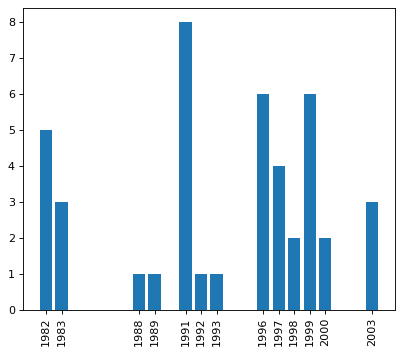

In [139]:
figure(figsize=(6, 5), dpi=80)

years = sorted(medals["Year"].unique())
counts = medals.groupby('Year')['Year'].count()
plt.xticks(years, rotation='vertical')
plt.bar(years, counts, width=0.8)  # šířka sloupečku

plt.show()

### Rozdělení na jednotlivé kovy
* medaile podle kovu - vyřešeno překrývání sloupců !

In [140]:
# nutnost mít list se všemi (nenulovými) roky

years_all = sorted(df_m_ranky.Year.unique())  # 1956-2008
print(len(years_all))
golds, silvers, bronzes = [0 for i in years_all],[0 for i in years_all],[0 for i in years_all]
print(len(golds))

47
47


In [141]:
# jeden list pro každou medaili
# nutnost změnit na numpy array, protože jinak nefungovalo dvojité stackování, ale jen jednoduché 
# (silver: bottom = gold, ale bronze = gold + silver, tak to už ne)

for i in range(len(years_all)):
    df = df_m_ranky.loc[df_m_ranky.Year == years_all[i]].copy()
    df_g = df.loc[df.Final_rank == 1]
    df_s = df.loc[df.Final_rank == 2]
    df_b = df.loc[df.Final_rank == 3]
    
    golds[i], silvers[i], bronzes[i] = len(df_g), len(df_s), len(df_b) 

golds = np.array(golds)
silvers = np.array(silvers)
bronzes = np.array(bronzes)

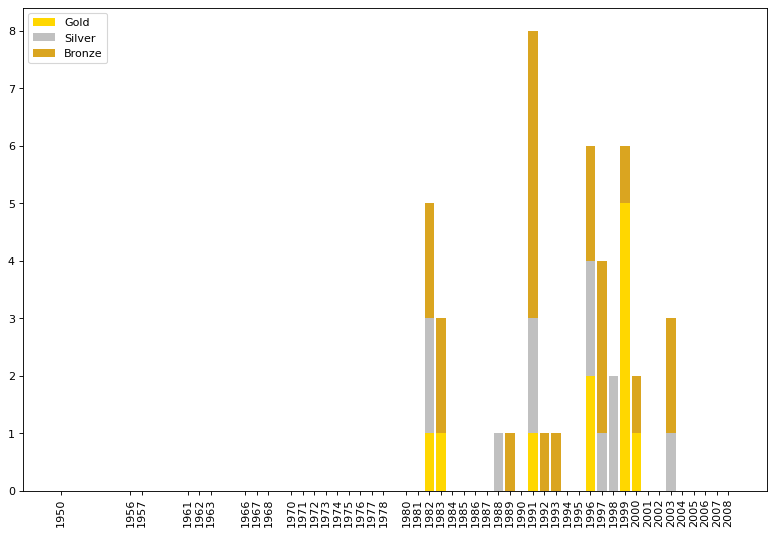

In [142]:
figure(figsize=(12, 8), dpi=80)

plt.xticks(years_all ,rotation='vertical') 
plt.bar(years_all, golds,                          color = "gold",         label = "Gold")
plt.bar(years_all, silvers, bottom = golds,        color = "silver",     label = "Silver")
plt.bar(years_all, bronzes, bottom = golds+silvers, color = "goldenrod",  label = "Bronze")

plt.legend(loc = "upper left")
plt.show()

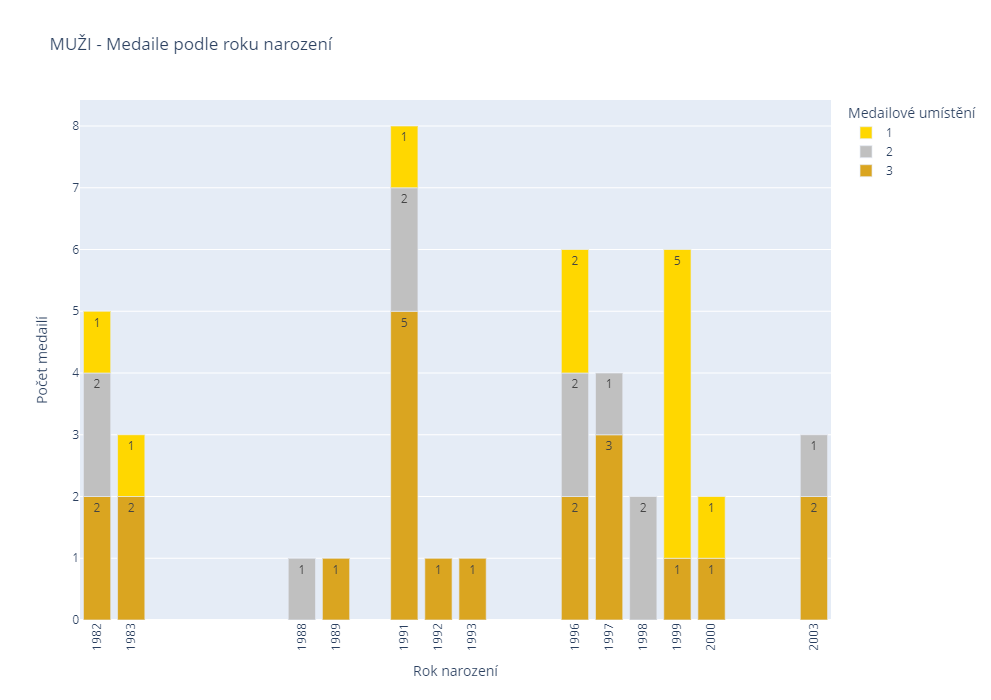

In [143]:
medals = df_m_ranky.loc[df_m_ranky.Final_rank.isin([1,2,3]), :]
d4 = pd.DataFrame({'count' : medals.groupby( ['Year', "Final_rank"] ).size()}).reset_index()
d4["Final_rank"] = d4["Final_rank"].astype(str) # nezbytné pro diskrétní barvy: https://plotly.com/python/discrete-color/

if SEX == "W":
    title_sex = "ŽENY"
elif SEX == "M":
    title_sex = "MUŽI"
else:
    title_sex = "ERROR"
    
fig = px.bar(d4, x= d4["Year"],
             y= d4["count"], 
             color = d4["Final_rank"] ,
             color_discrete_map={"1": "gold", "2":"silver", "3":"goldenrod"},  # definice barev
             #hover_name="Final_rank",   # extra info ve float popisku
             text_auto='.0f',      # případně můžu zap/vyp číselné popisky  # .0f = přesné číslo, .0s je na desítky
             width=950, height=700,
             labels = {"Final_rank": "Medailové umístění"},  # Novinka: můžu přepsat konkrétní místo, toto je konkrétně automaticky vygenerovaný název legendy
             category_orders={"Final_rank": ["3","2","1"]},      ## NOVINKA, pro pořadí v legendě, reaguje níže na reversed  #https://plotly.com/python/legend/
             title = f"{title_sex} - Medaile podle roku narození")

fig.update_layout(legend_traceorder="reversed")  ## NOVINKA, pro stackování sloupců odspoda,  #https://plotly.com/python/legend/

fig.update_layout(xaxis = dict(tickvals = d4["Year"]))
fig.update_xaxes(tickangle=270)
fig.update_xaxes(title_text="Rok narození")
fig.update_yaxes(title_text="Počet medailí")
fig.show()

pio.write_html(fig, file = f"vizualizace/V3_Medals-Year_{SEX}.html", auto_open=True)

## Medaile souhrn podle klubu

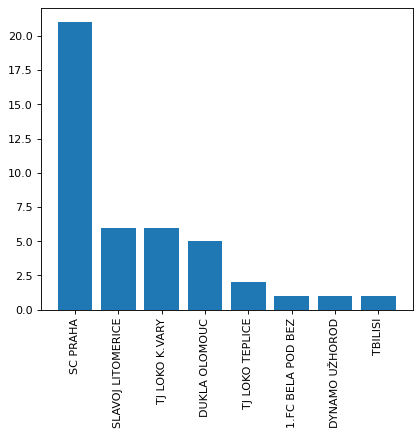

In [144]:
figure(figsize=(6, 5), dpi=80)

clubs = medals.groupby(['Club'])['Club'].count().to_dict()
clubs = dict(sorted(clubs.items(), key=lambda item: item[1], reverse = True))

plt.xticks(rotation='vertical')                             
plt.bar(list(clubs.keys()), list(clubs.values()), width=0.8)

plt.show()

### Rozdělení na jednotlivé kovy
* jediné co chybí, je řazení podle nejvyššího součtu, jako výše
* na to bych potřeboval dictionary

In [145]:
clubs_all = sorted(df_m.Club.unique()) 
print(len(clubs_all))
golds, silvers, bronzes = [0 for i in clubs_all],[0 for i in clubs_all],[0 for i in clubs_all]
print(len(golds))

40
40


In [146]:
# jeden list pro každou medaili
# nutnost změnit na numpy array, protože jinak nefungovalo dvojité stackování, ale jen jednoduché 
# (silver: bottom = gold, ale bronze = gold + silver, tak to už ne)

for i in range(len(clubs_all)):
    df = df_m.loc[df_m.Club == clubs_all[i]].copy()
    df_g = df.loc[df.Final_rank == 1]
    df_s = df.loc[df.Final_rank == 2]
    df_b = df.loc[df.Final_rank == 3]
    
    golds[i], silvers[i], bronzes[i] = len(df_g), len(df_s), len(df_b) 

golds = np.array(golds)
silvers = np.array(silvers)
bronzes = np.array(bronzes)

AttributeError: 'DataFrame' object has no attribute 'Final_rank'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

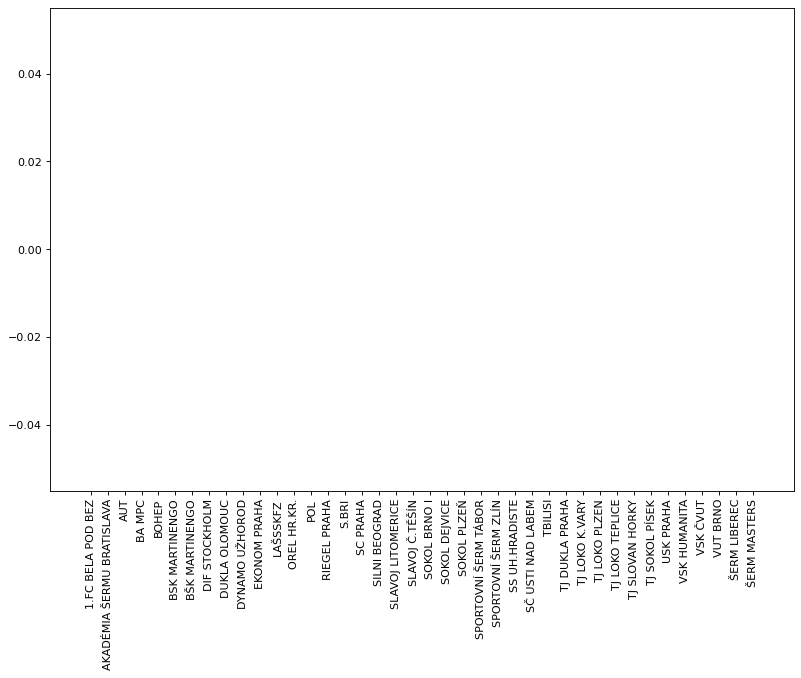

In [147]:
figure(figsize=(12, 8), dpi=80)

 #stačilo zas odmazat clubs_all z xticks
plt.xticks(rotation='vertical')  
plt.bar(clubs_all, golds,                           color = "gold",      label = "Gold")
plt.bar(clubs_all, silvers, bottom = golds,         color = "silver",    label = "Silver")
plt.bar(clubs_all, bronzes, bottom = golds+silvers, color = "goldenrod", label = "Bronze")

plt.legend(loc = "upper left")
plt.show()

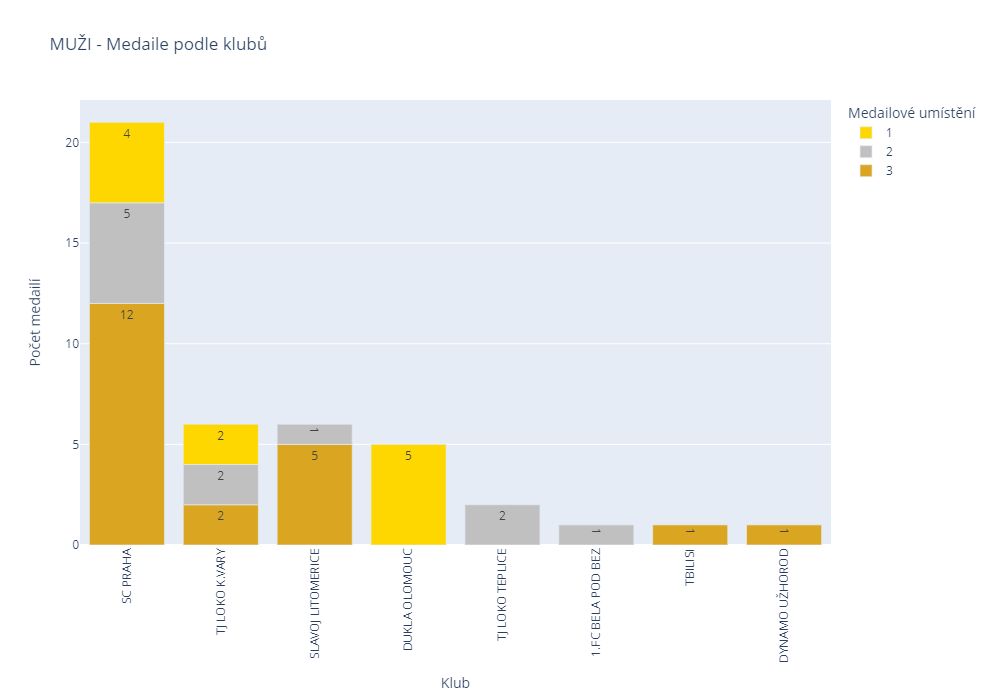

In [148]:
medals = df_m_ranky.loc[df_m_ranky.Final_rank.isin([1,2,3]), :]
d5 = pd.DataFrame({'count' : medals.groupby( ['Club', "Final_rank"] ).size()}).reset_index()
d5["Final_rank"] = d5["Final_rank"].astype(str) # nezbytné pro diskrétní barvy: https://plotly.com/python/discrete-color/

if SEX == "W":
    title_sex = "ŽENY"
elif SEX == "M":
    title_sex = "MUŽI"
else:
    title_sex = "ERROR"
    
    
fig = px.bar(d5,
             x= d5["Club"],
             y= d5["count"], 
             color = d5["Final_rank"] ,
             color_discrete_map={"1": "gold", "2":"silver", "3":"goldenrod"},  # definice barev
             #hover_name="Final_rank",   # extra info ve float popisku
             text_auto='.0f',     # případně můžu zap/vyp číselné popisky  # .0f = přesné číslo, .0s je na desítky
             width=950, height=700,
             labels = {"Final_rank": "Medailové umístění"},  # Novinka: můžu přepsat konkrétní místo, toto je konkrétně automaticky vygenerovaný název legendy
             category_orders={"Final_rank": ["3","2","1"]},      ## NOVINKA, pro pořadí v legendě, reaguje níže na reversed  #https://plotly.com/python/legend/
             title = f"{title_sex} - Medaile podle klubů")

fig.update_layout(xaxis = dict(tickvals = d5["Club"]))
fig.update_layout(xaxis={'categoryorder':'total descending'}) # extra řazeni od nejvyššího totalu
fig.update_layout(legend_traceorder="reversed")  ## NOVINKA, pro stackování sloupců odspoda,  #https://plotly.com/python/legend/

fig.update_xaxes(tickangle=270)
fig.update_xaxes(title_text="Klub")
fig.update_yaxes(title_text="Počet medailí")
fig.show()

pio.write_html(fig, file = f"vizualizace/V4_Medals-Club_{SEX}.html", auto_open=True)

## Pokus s dropdowny 1

https://plotly.com/python/dropdowns/

 - zde nevím, co tam nacpat dovnitř Buttons, místo toho type - jako něco co filtruje moje data?

https://stackoverflow.com/questions/68894919/how-to-set-the-values-of-args-and-args2-in-plotlys-buttons-in-updatemenus

https://plotly.com/python/bar-charts/  - graph_objects obecně

https://plotly.com/python/graph-objects/ - rozdíl plotly express vs. graph_objects

https://plotly.com/python/dropdowns/ - sekce "Update Dropdowns" - zde jsou Příklady na Scatter Dropdown s graph_objects

 - musí se px.bar(...) předělat na go.Bar(...)
 - musí se používat listy atd.
 - musím mít připravené všechny add_trace s různými verzemi dat
 - ten dropdown je jen zviditelnuje
 
 https://plotly.com/python/bar-charts/  - Bar charts in Dash = budoucí alternativa

## REAL DATA

In [6]:
df_tot = result = pd.concat([df_w, df_m])

print(len(df_w), len(df_m), len(df_tot))

139 195 334


## Testy
https://plotly.com/python/graph-objects/

Hledání možnosti, jak zobrazit: 
* Dropdowny (potřbeuju graph_object, px.bar() to úplně nepodporuje)
* Barevný split v graph_object (px.bar() to umí snadno)

In [7]:
display(df_w.head(2))

df_w2 = pd.DataFrame({'count' : df_w.groupby( [ 'Year', "Club"] ).size()}).reset_index()
df_w2.head(5)

Name             Club Country Sex  Birthdate  Year
0        ADAMCOVÁ Anita   TJ LOKO K.VARY     CZE   W 2006-01-22  2006
1  AIGERMANOVÁ Gabriela  TJ LOKO TEPLICE     CZE   W 2002-06-07  2002

Year            Club  count
0  1972       BOHEMIANS      1
1  1973  SS UH.HRADISTE      1
2  1975       USK PRAHA      1
3  1978        SC PRAHA      1
4  1978  TJ SOKOL PÍSEK      1

In [26]:
# zajímavý koncept, se kterým bych chtěl dál pracovat

for club, group in df_w.groupby("Club"):
    print (club)
    print(group)
    print("############################################################################")
     

1.FC BELA POD BEZ
                   Name               Club Country Sex  Birthdate  Year
12       COUFALOVÁ Anna  1.FC BELA POD BEZ     CZE   W 2000-04-01  2000
73       NOVÁKOVÁ Petra  1.FC BELA POD BEZ     CZE   W 2002-05-25  2002
74   NOVÁČKOVÁ Dominika  1.FC BELA POD BEZ     CZE   W 2003-08-29  2003
133    ŠAFRÁNKOVÁ Adéla  1.FC BELA POD BEZ     CZE   W 2006-06-06  2006
############################################################################
ASBVA
              Name   Club Country Sex  Birthdate  Year
60  LINDEROVÁ Nina  ASBVA     SVK   W 1991-01-01  1991
############################################################################
AŠ BRATISLAVA
                Name           Club Country Sex  Birthdate  Year
8     BURSOVÁ Regina  AŠ BRATISLAVA     SVK   W 2001-04-13  2001
91     ROŠKOVÁ Sonja  AŠ BRATISLAVA     SVK   W 2000-02-10  2000
94  SASVARIOVÁ Laura  AŠ BRATISLAVA     SVK   W 1999-01-01  1999
############################################################################
B

## Verze PX

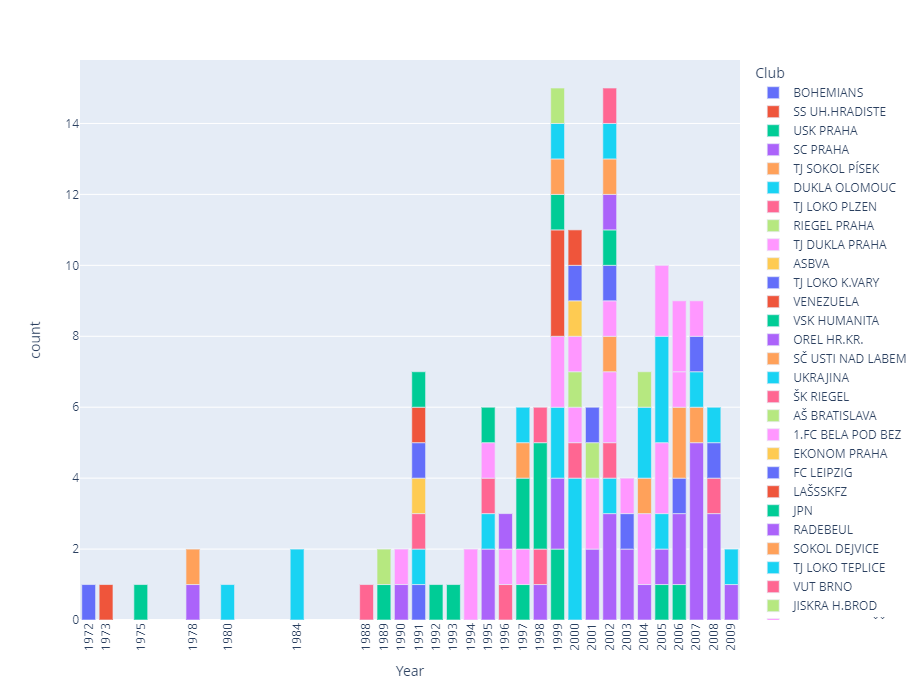

In [8]:
fig = px.bar(df_w2, x="Year", y="count", color="Club", width=950, height=700,)
fig.update_layout(xaxis = dict(tickvals = df_w2["Year"]))
fig.update_xaxes(tickangle=270)
fig.show()

## Ekvivalent v graph_object
* je to teda zvláštní, protože tam přidávám add_trace pro každý jeden klub/groupu

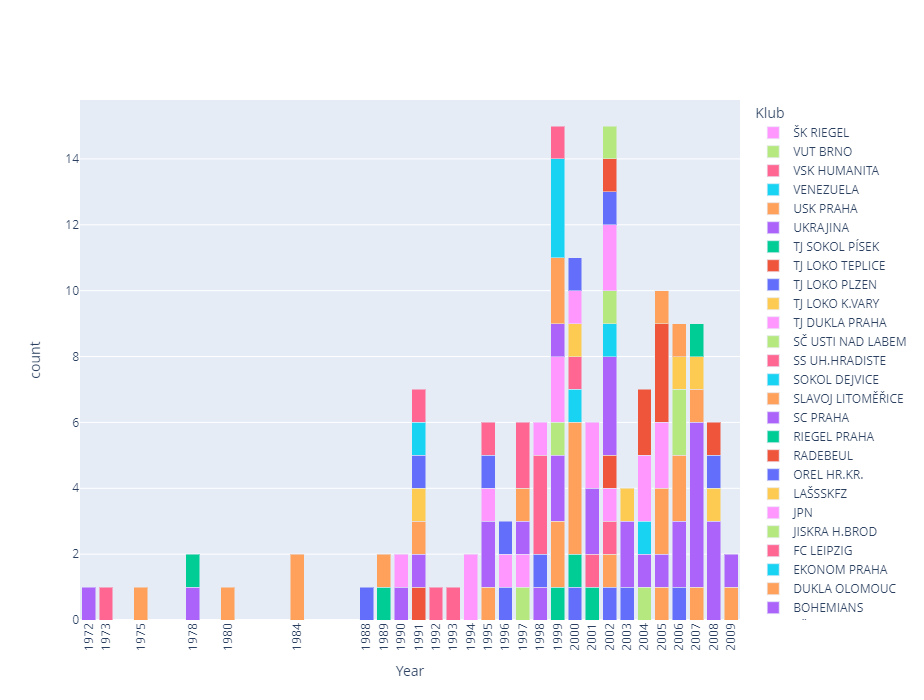

In [9]:
df_w2 = pd.DataFrame({'count' : df_w.groupby( [ 'Year', "Club"] ).size()}).reset_index()

fig = go.Figure()

### verze která je obarvená podle klubu
for club, group in df_w2.groupby("Club"):
    fig.add_trace(go.Bar(x=group["Year"], y=group["count"], name=club))

### verze bez barev, jako jediný add_trace
#fig.add_trace(go.Bar(x=df_w2["Year"], y=df_w2["count"] )) # name = df_w2["Club"]))

## toto byl trik, jak porazit defaultní "group" verzi sloupců. nejde to napsat do argumentu do go.Bar() !
fig.update_layout(barmode='stack')  
fig.update_layout(legend_title_text = "Klub", width=950, height=700,)

fig.update_layout(xaxis = dict(tickvals = df_w2["Year"]))          # je OK používat pro Ticks d2, když tu pracuju s df_w2? fungují oba
fig.update_xaxes(tickangle=270)

fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="count")
fig.show()

## kombinace s dropdowny - špatně se sčítají data
* je to teda zvláštní, protože tam přidávám add_trace pro každý jeden klub/groupu
* a pak to dělám ještě per dataset, abych mohl dropdownovat podle toho
* docela mi i fungují dropdowny, ale data jsou divná:
  - defaultně tam mám samozřejmě součet všeho, W+M+ALL
  - a pak All odpovídá ženám, a zbylé dva grafy jsou divné
 
PAK UŽ JEN DALŠÍ ŘEŠENÍ JSOU TY FACCETTES SPLIT

In [10]:
df_w2 = pd.DataFrame({'count' : df_w.groupby( [ 'Year', "Club"] ).size()}).reset_index()
display(df_w2.head())
for club, group in df_w2.groupby("Club"):
    print(club, group)

Year            Club  count
0  1972       BOHEMIANS      1
1  1973  SS UH.HRADISTE      1
2  1975       USK PRAHA      1
3  1978        SC PRAHA      1
4  1978  TJ SOKOL PÍSEK      1

1.FC BELA POD BEZ     Year               Club  count
48  2000  1.FC BELA POD BEZ      1
60  2002  1.FC BELA POD BEZ      1
72  2003  1.FC BELA POD BEZ      1
86  2006  1.FC BELA POD BEZ      1
ASBVA     Year   Club  count
12  1991  ASBVA      1
AŠ BRATISLAVA     Year           Club  count
39  1999  AŠ BRATISLAVA      1
49  2000  AŠ BRATISLAVA      1
56  2001  AŠ BRATISLAVA      1
BOHEMIANS     Year       Club  count
0   1972  BOHEMIANS      1
13  1991  BOHEMIANS      1
DUKLA OLOMOUC      Year           Club  count
5    1980  DUKLA OLOMOUC      1
6    1984  DUKLA OLOMOUC      2
14   1991  DUKLA OLOMOUC      1
22   1995  DUKLA OLOMOUC      1
40   1999  DUKLA OLOMOUC      2
50   2000  DUKLA OLOMOUC      4
61   2002  DUKLA OLOMOUC      1
80   2005  DUKLA OLOMOUC      1
92   2007  DUKLA OLOMOUC      1
101  2009  DUKLA OLOMOUC      1
EKONOM PRAHA     Year          Club  count
51  2000  EKONOM PRAHA      1
FC LEIPZIG     Year        Club  count
52  2000  FC LEIPZIG      1
57  2001  FC LEIPZIG

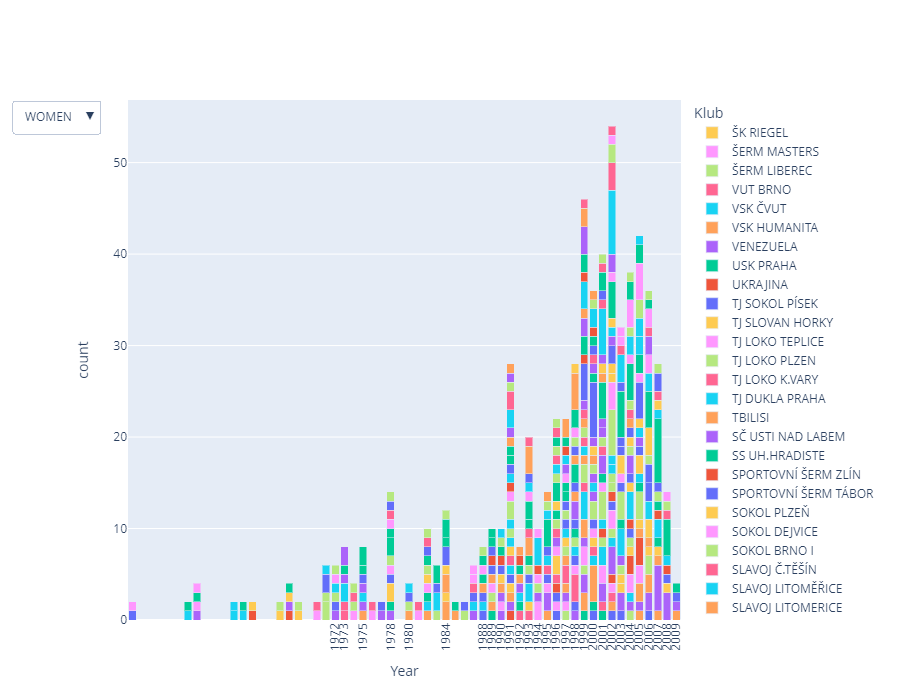

In [11]:
df_w2 = pd.DataFrame({'count' : df_w.groupby( [ 'Year', "Club"] ).size()}).reset_index()
df_m2 = pd.DataFrame({'count' : df_m.groupby( [ 'Year', "Club"] ).size()}).reset_index()
df_tot = result = pd.concat([df_w, df_m])
df_tot2 = pd.DataFrame({'count' : df_tot.groupby( [ 'Year', "Club"] ).size()}).reset_index()


fig = go.Figure()
for club, group in df_w2.groupby("Club"):
    fig.add_trace(go.Bar(x=group["Year"], y=group["count"], name=club))
    
for club, group in df_m2.groupby("Club"):
    fig.add_trace(go.Bar(x=group["Year"], y=group["count"], name=club))

for club, group in df_tot2.groupby("Club"):
    fig.add_trace(go.Bar(x=group["Year"], y=group["count"], name=club))
    
## toto byl trik, jak porazit defaultní "group" verzi sloupců. nejde to napsat do argumentu do go.Bar() !
fig.update_layout(barmode='stack')  
fig.update_layout(legend_title_text = "Klub", width=950, height=700,)

fig.update_layout(xaxis = dict(tickvals = df_w2["Year"]))                 # je OK používat pro Ticks d2, když tu pracuju s df_w2? fungují oba
fig.update_xaxes(tickangle=270)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="WOMEN",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Women Titile"}]),
                dict(label="MEN",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Men Title"}]),
                dict(label="ALL",
                    method="update",
                      args=[{"visible": [False, False, True]},
                           {"title": "All Title"}]),
                dict(label="ALL_2",
                    method="update",
                      args=[{"visible": [True, True, False]},
                           {"title": "All Title"}])
            ]))])


fig.update_xaxes(title_text="Rok")
fig.update_yaxes(title_text="Počet")
fig.show()

## KLON - jiný nahrávání trace
### Výsledek: na začátku aspoň barevné podle trace, poté už ne :/ podle klubů už vůbec
### !!!!! Vymyslel jsem třetí button tak, aby to byl mix dvou grafů žejo !!
### aplikovat klidně i výše. nikoliv samostatný trace se součtem dat, ale dva grafy najendou. ale chybí mi zase kluby...

### vykoušet i u verze výše: pohrát si s třetí stopou, možná ji nedávat vůbec, dva způsoby nahrání stopy, dva způsoby tlačítka ALL, atd. ...

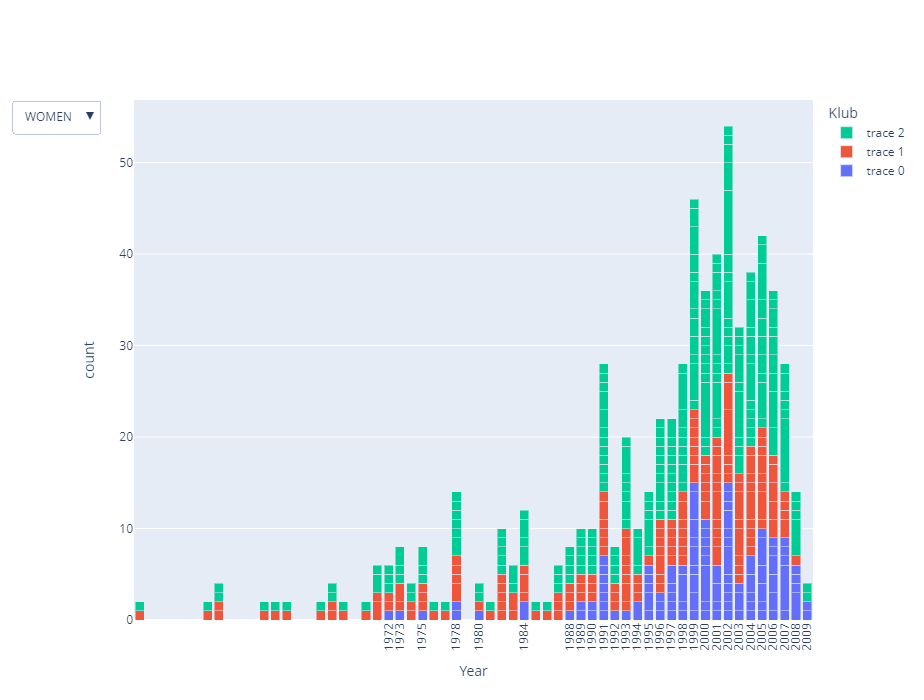

In [12]:
df_w2 = pd.DataFrame({'count' : df_w.groupby( [ 'Year', "Club"] ).size()}).reset_index()
df_m2 = pd.DataFrame({'count' : df_m.groupby( [ 'Year', "Club"] ).size()}).reset_index()
df_tot = result = pd.concat([df_w, df_m])
df_tot2 = pd.DataFrame({'count' : df_tot.groupby( [ 'Year', "Club"] ).size()}).reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(x=df_w2["Year"], y=df_w2["count"] ))

fig.add_trace(go.Bar(x=df_m2["Year"], y=df_m2["count"] ))

fig.add_trace(go.Bar(x=df_tot2["Year"], y=df_tot2["count"] ))

    
## toto byl trik, jak porazit defaultní "group" verzi sloupců. nejde to napsat do argumentu do go.Bar() !
fig.update_layout(barmode='stack')  
fig.update_layout(legend_title_text = "Klub", width=950, height=700,)

fig.update_layout(xaxis = dict(tickvals = df_w2["Year"]))                 # je OK používat pro Ticks d2, když tu pracuju s df_w2? fungují oba
fig.update_xaxes(tickangle=270)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="WOMEN",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Women Titile"}]),
                dict(label="MEN",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Men Title"}]),
                dict(label="ALL",
                    method="update",
                      args=[{"visible": [False, False, True]},
                           {"title": "All Title"}]),
                dict(label="ALL_2",
                    method="update",
                      args=[{"visible": [True, True, False]},
                           {"title": "All Title"}])
            ]))])


fig.update_xaxes(title_text="Rok")
fig.update_yaxes(title_text="Počet")
fig.show()

## 23.1.23 Aplikování výše uvedeného, dvě stopy plus jejich součet, hezkydf_m2 barevně odlišené. 
## Chybí jen barevný rozpad na kluby, na to asi budou grafy zvlášť
* Eventuálně by mohly všechny grafy na stránce reagoat na bějaký checkbox na začátku stránky, a podle něj by se vybraly správné soubory žejo


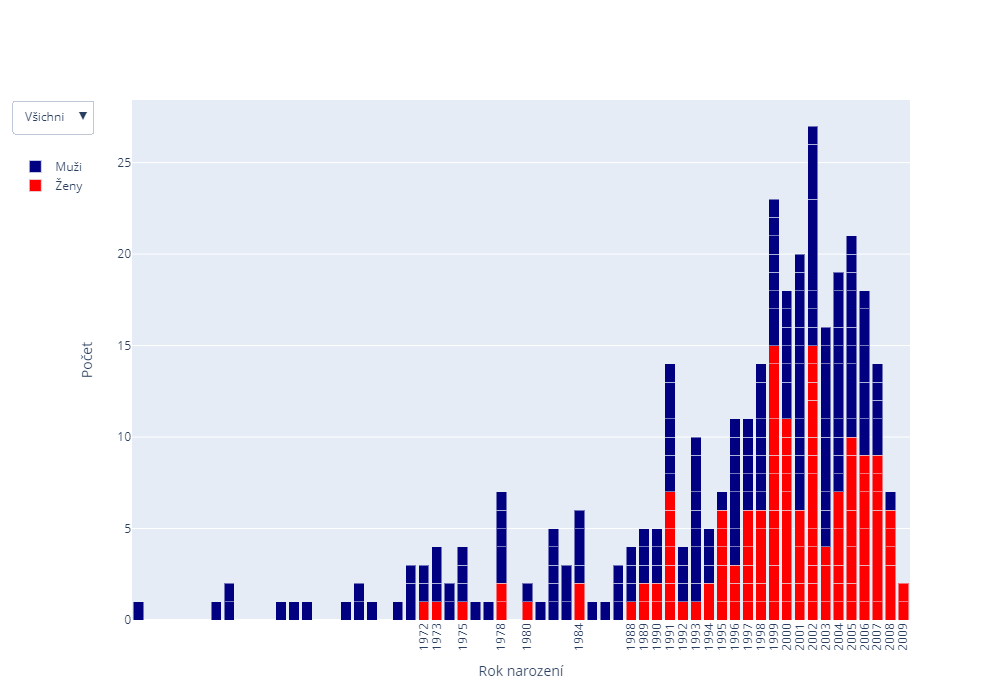

In [111]:
df_w2 = pd.DataFrame({'count' : df_w.groupby( [ 'Year', "Club"] ).size()}).reset_index()
df_m2 = pd.DataFrame({'count' : df_m.groupby( [ 'Year', "Club"] ).size()}).reset_index()

fig = go.Figure()

# black, blue (tmavší než originál), navy = darkblue, cornflowerblue
# red, orange, coral, crimson

fig.add_trace(go.Bar(x=df_w2["Year"], y=df_w2["count"], name = "Ženy", marker=dict(color = "red")))

fig.add_trace(go.Bar(x=df_m2["Year"], y=df_m2["count"], name = "Muži", marker=dict(color = "navy")))
    
## toto byl trik, jak porazit defaultní "group" verzi sloupců. nejde to napsat do argumentu do go.Bar() !
fig.update_layout(barmode='stack')  
fig.update_layout( width=950, height=700,) #legend_title_text = "Klub",

fig.update_layout(xaxis = dict(tickvals = df_w2["Year"]))                 # je OK používat pro Ticks d2, když tu pracuju s df_w2? fungují oba
fig.update_xaxes(tickangle=270)

fig.update_layout(legend=dict(yanchor="top", y=0.9, xanchor="left", x= -0.15))

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Všichni",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Všichni"}]),
                dict(label="Ženy",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Ženy"}]),
                dict(label="Muži",
                    method="update",
                      args=[{"visible": [False, True]},
                           {"title": "Muži"}])
            ]))])


fig.update_xaxes(title_text="Rok narození")
fig.update_yaxes(title_text="Počet")
fig.show()

pio.write_html(fig, file = f"vizualizace/V1_Year-Club_All.html", auto_open=True)   



* Eventuálně nápad druhé řešení, co bude trochu lame, by bylo si úplně totálně předpočítat všechny "tři" datasety, kde uř kluby budou po měsících posčítané, ještě bude sloupeček pohlaví, tak abych nemusel dávat ty ad_trace pro každou dvojici, ale jen jednou per pohlaví...? to musí jít nějak, ta data předžvýkat....
* eventuálně si číct: chci tam rok, klub, pohlaví. abrvu chci podle klubu. Dropdown podle pohlaví. easy. step by step

In [31]:
data={'Year': ['1990', "1990",'1992','1993',"1993", "1993",'1996'],
      'Club': ["A","A", "B","B", "B","C", "D"], 
      "count":[3,  2, 3, 4, 5, 1, 4], 
      "sex":  ["W", "M", "M", "W", "M", "M", "M"]}
test =pd.DataFrame(data)
test

Year Club  count sex
0  1990    A      3   W
1  1990    A      2   M
2  1992    B      3   M
3  1993    B      4   W
4  1993    B      5   M
5  1993    C      1   M
6  1996    D      4   M

## vyřešit proč to taky rozbíjí data, na tomto mini příkladě, a pak i viz výše!!

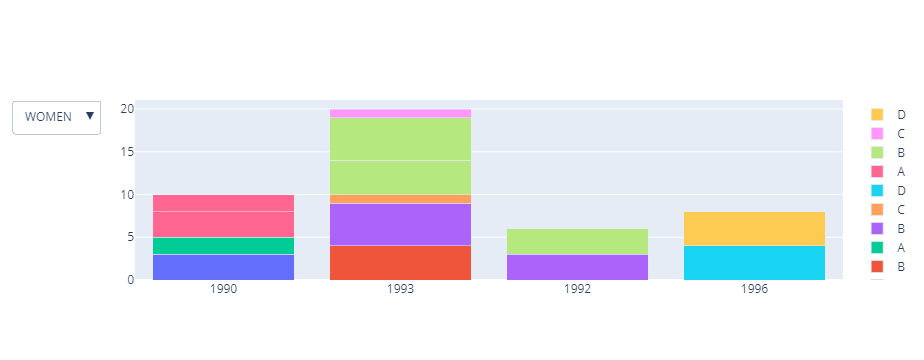

In [32]:
fig = go.Figure()
for club, group in test[test["sex"] == "W"].groupby("Club"):
    fig.add_trace(go.Bar(x=group["Year"], y=group["count"], name=club))
for club, group in test[test["sex"] == "M"].groupby("Club"):
    fig.add_trace(go.Bar(x=group["Year"], y=group["count"], name=club))
for club, group in test.groupby("Club"):
    fig.add_trace(go.Bar(x=group["Year"], y=group["count"], name=club))
    
fig.update_layout(barmode='stack')  

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="WOMEN",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Women Titile"}]),
                dict(label="MEN",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Men Title"}]),
                dict(label="ALL",
                    method="update",
                      args=[{"visible": [False, False, True]},
                           {"title": "All Title"}])
            ]))])

fig.show()

## Best I can Do - problém s barvami, oproti px.bar() jdou blbě nastavit

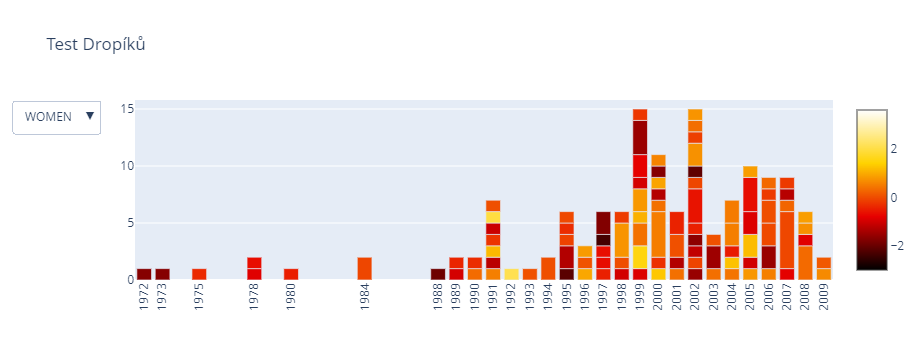

In [33]:
# barvičky: https://www.geeksforgeeks.org/how-to-change-a-color-bar-in-plotly-in-python/

df_w2 = pd.DataFrame({'count' : df_w.groupby( [ 'Year', "Club"] ).size()}).reset_index()
df_m2 = pd.DataFrame({'count' : df_m.groupby( [ 'Year', "Club"] ).size()}).reset_index()
df_tot2 = pd.DataFrame({'count' : df_tot.groupby( [ 'Year', "Club"] ).size()}).reset_index()

###
# for contestant, group in df.groupby("Contestant"):
#     fig.add_trace(go.Bar(x=group["Fruit"], y=group["Number Eaten"], name=contestant
####                         



fig = go.Figure()

fig.add_trace(go.Bar(x = df_w2["Year"],
                     y = list(df_w2["count"]),  # používat určitě formát df["col_name"], nikoli df.col_name
                     #legend = df_w2["Club"] ,  # to co mi právě nejde...
                     marker = dict(
                                 color=np.random.randn(500),
                                 colorscale='hot',
                                 showscale=True),
                     
                     name="Women",
                     visible = True))

fig.add_trace(go.Bar(x = df_m2.Year,
                     y = list(df_m2["count"]),
                     name="Men",
                     visible=False))

fig.add_trace(go.Bar(x = df_tot2.Year,
                     y = list(df_tot2["count"]),
                     name="All",
                     visible=False))

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="WOMEN",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Women Titile"}]),
                dict(label="MEN",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Men Title"}]),
                dict(label="ALL",
                    method="update",
                      args=[{"visible": [False, False, True]},
                           {"title": "All Title"}])
            ]))])

fig.update_layout(title_text="Test Dropíků") 
fig.update_layout(xaxis = dict(tickvals = df_tot2["Year"]))
fig.update_xaxes(tickangle=270)

fig.show()

## Pokus s dual-facette grafem (pohlaví)
https://plotly.com/python/legend/

## II.2 ZÁPASY


In [34]:
def merge_all_matches(list_of_events, sex):
    df_tot = pd.DataFrame(columns = ["Date", "Event", "Name", "Uni", "Sex", "Fight_lvl",
                                     "Enemy", "Enemy_uni", "Result", "Scored", "Received"])
    if sex == "M":
        s = "men"
    else:
        s = "women"
    for event in list_of_events:
        e = pd.ExcelFile(f"C:/Users/jzelenka/Documents/python_j/fencing/data/{s}/" + event)
        df0 = pd.read_excel(e, 'pools')
        df1 = pd.read_excel(e, 'eliminations')
        
        print(f"Event {event} has {len(df0)} pool fights, {len(df1)} elimination fights and {len(df0['Name'].unique())} unique Names")

        df_tot = df_tot.append(pd.concat([df0, df1]))
        print(f"now total is: {len(df_tot)}")
        printbold("####################################")
        
    df_tot.reset_index(inplace=True, drop = True)
    df_tot = df_tot.rename(columns={"Uni":'Club', "Enemy_uni": "Enemy_Club" })
    
    return df_tot

In [35]:
df_m_matches = merge_all_matches(men, "M")
print(len(df_m_matches))
display(df_m_matches.head(2))
display(df_m_matches.tail(2))

NameError: name 'men' is not defined

In [ ]:
df_m_matches.describe()

In [ ]:
df_m_matches["Name"] = df_m_matches["Name"].replace(to_replace_man)     
df_m_matches["Club"] = df_m_matches["Club"].replace(to_replace_club)  
df_m_matches["Enemy_Club"] = df_m_matches["Enemy_Club"].replace(to_replace_club)  
df_m_matches['Name'].str.strip()

In [ ]:
df_m_matches.describe()

In [ ]:
# ANDERLE petr,
# CHOUN Karim
# D'AMICO Kristian
# DOŠEK Jirí
# HORBACHUCK Yuiriy
# JAVAKHISHVILI Georgii '
# KALUS Jonáš '
# LOKAJ Václav ',
# LUCOVIC Matej
# MAŠATA Vojtech  10/19
# POKORNÝ Richard '
# PROCHÁZKA Ondrej
# SALZER Jirí
# SALZER Matej
# SURMA Štepán
# VAŠÍCEK Martin

In [ ]:
sorted(df_m_matches["Name"].unique())

## až opravím jména (hromadně, nebo už v excelech?)
## tak můžu přikročit ke kontrole V vs D, a k součtům Dal - dostal atd
# kontrola jestli někdo nemá V a víc zásahů než bodů, a naopak.